In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [10]:
data = pd.read_csv("C:/Users/stsat/Downloads/student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [9]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [12]:
data.tail(7)

,Hours,Scores
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [13]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [17]:
data.dtypes

Hours     float64
Scores      int64
dtype: object

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [19]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [20]:
data.mean()

Hours      5.012
Scores    51.480
dtype: float64

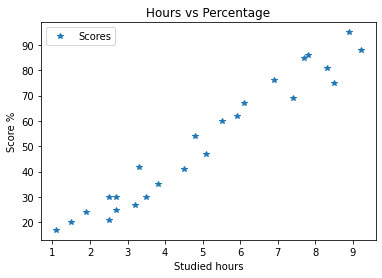

In [26]:
data.plot(x='Hours', y='Scores', style='*')
plt.title('Hours vs Percentage')
plt.xlabel('Studied hours')
plt.ylabel('Score %')
plt.show()


In [27]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


In [34]:
X = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [35]:
from sklearn.linear_model import LinearRegression 
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training completed.")

Training completed.


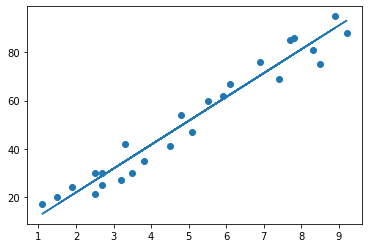

In [37]:
line = regressor.coef_*X+regressor.intercept_

plt.scatter(X,y)
plt.plot(X, line);
plt.show()

In [38]:
print(X_test)
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [39]:
print("Predicted Values")
y_pred

Predicted Values


array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [40]:
df = pd.DataFrame({'Actual': y_test, 'predicted': y_pred})
df

,Actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [41]:
hours = 9.25
y_pred = regressor.predict([[hours]])
y_pred

array([93.69173249])

In [44]:
import statsmodels.api as sm
X_addC = sm.add_constant(X)
result = sm.OLS(y, X_addC).fit()

In [45]:
print("R Squared : ",result.rsquared)

R Squared :  0.9529481969048356


In [46]:
print("R Squared : ",result.rsquared_adj)

R Squared :  0.9509024663354806
